# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
csv_file_path = "/content/drive/MyDrive/CURSOS/EBAC/Cientista de Dados/13 - Estatística Básica/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv"

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv(csv_file_path, delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [4]:
#Seu código aqui para a média
df.groupby("Categoria")["Preco_Normal"].mean().round(2).reset_index().sort_values(by="Preco_Normal", ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.04
5,lacteos,2385.22
2,congelados,2108.04
0,belleza-y-cuidado-personal,1783.56
3,frutas,1724.47
6,verduras,1343.30
4,instantaneos-y-sopas,765.49


In [5]:
#Seu código aqui para a mediana
df.groupby("Categoria")["Preco_Normal"].median().round(2).reset_index().sort_values(by="Preco_Normal", ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias:

*   comidas-preparadas - média **194,96 abaixo** da mediana
*   lacteos - média **1.396,22 acima** da mediana
*   congelados - média **589,04 acima** da mediana
*   belleza-y-cuidado-personal - média **214,56 acima** da mediana
*   frutas - média **529,47 acima** da mediana
*   verduras - média **163,30 acima** da mediana
*   instantaneos-y-sopas - média **326,49 acima** da mediana

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [6]:
#Seu código aqui
df.groupby("Categoria")["Preco_Normal"].std().round(2).reset_index()

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,2210.04
1,comidas-preparadas,2019.91
2,congelados,2111.54
3,frutas,1639.15
4,instantaneos-y-sopas,1170.23
5,lacteos,3925.82
6,verduras,1012.70


Digite nesse campo o comportamento que você identificou.
* Pode-se verificar que o desvio padrão das categorias **lacteos**, **comidas-preparadas**, **belleza-y-cuidado-personal** e **instantaneos-y-sopas** está alto em relação à media e mediana, com destaque para a categoria **lacteos**. O desvio padrão alto (distante da média) sugere que existe uma grande variedade de preços dentro dessas categorias.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

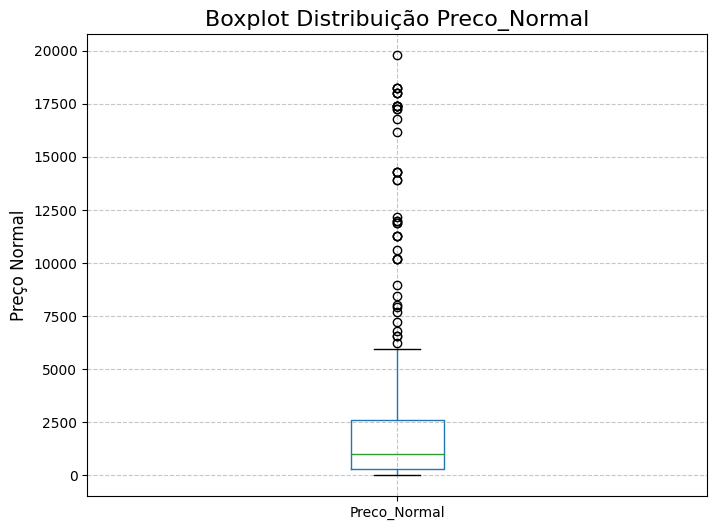

In [7]:
#Seu código aqui
plt.figure(figsize=(8, 6))
df.loc[df['Categoria'] == 'lacteos'].boxplot(column="Preco_Normal")

plt.title('Boxplot Distribuição Preco_Normal', fontsize=16)
plt.ylabel('Preço Normal', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

A maioria do preços se encontram na faixa abaixo de 2500, e acima do limite superior são apresentados diversos outliers que estão fazendo com que o desvio padrão fique tão distante da média de preços, pois são preços muito altos, podendo chegar até 20.000

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

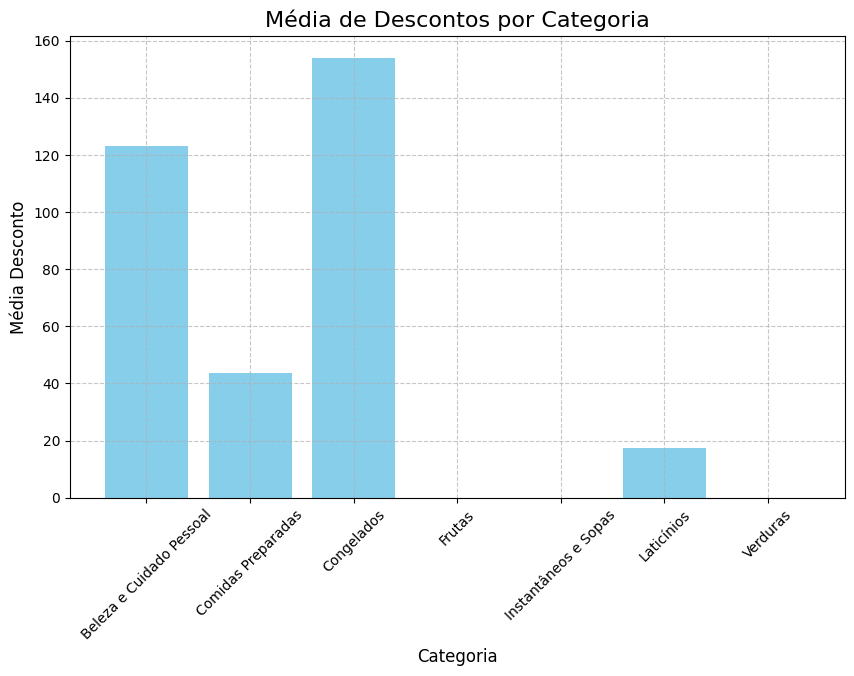

In [9]:
# Seu código aqui

plt.figure(figsize=(10, 6))
md_desc_categoria = df.groupby('Categoria')['Desconto'].mean()
plt.bar(md_desc_categoria.index, md_desc_categoria, color='skyblue')
plt.title('Média de Descontos por Categoria', fontsize=16)

novos_rotulos = ["Beleza e Cuidado Pessoal", "Comidas Preparadas", "Congelados", "Frutas", "Instantâneos e Sopas", "Laticínios", "Verduras"]

plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Média Desconto', fontsize=12)
plt.xticks(ticks=range(len(novos_rotulos)), labels=novos_rotulos)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [21]:
# Seu código aqui
desc_md_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().round(2).reset_index()

fig = px.treemap(desc_md_por_categoria_marca,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Desconto Médio por Categoria e Marca',
                 color='Marca')
fig.show()